In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import os
from folium import plugins
import re
import io
import selenium
from selenium import webdriver
from PIL import Image
import time
from folium.plugins import MarkerCluster
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
chromedriver = 'chromedriver.exe'
driver = webdriver.Chrome(chromedriver)

In [3]:
os.getcwd()

'c:\\Users\\EonKim\\Desktop\\github\\khu seminar\\subway'

대학교 데이터

In [3]:
seoul = gpd.read_file(r'LARD_ADM_SECT_SGG_11.shp', encoding = 'euc-kr')
file = r'대학교.csv'
univ = pd.read_csv(file, encoding = 'cp949')
univer = univ.groupby('행정구').count().iloc[:,0]

In [60]:
univer = univer.sort_values(ascending=False)

In [ ]:
plt.figure(figsize = (10, 10), dpi = 200)
plt.bar(np.arange(len(univer)), univer.values)
plt.ylabel('대학교 수')
plt.yticks(np.arange(11))
plt.hlines(3, -1, 21, color = 'red', linestyles='--')
plt.title('서울 소재 대학교 수')
plt.xlabel('행정구역')
plt.xticks(np.arange(len(univer)), labels = univer.index, rotation = 25)
plt.savefig('univ_barplot.png')
plt.show()


In [ ]:
seoul_cen = [37.52255, 126.97370]
m = folium.Map(
    location = seoul_cen,
    zoom_start = 11
)

folium.Choropleth(
    geo_data = seoul, 
    data = univer,
    columns = (univer.index, univer.values),
    key_on = 'properties.SGG_NM',
    fill_color = 'OrRd',
    legend_name = '대학교 수'
).add_to(m)

# m.save('대학교.html')
m

In [38]:
file_name = f'\대학교.html'
file = r'C:\Users\EonKim\Desktop\github\khu seminar\subway' + file_name
browser = webdriver.Chrome('chromedriver.exe')
browser.get(file)
time.sleep(4)
browser.save_screenshot(f'대학교.png')
browser.quit()

상가 데이터 

In [4]:
file = r'상가임대정보.xlsx'
sangga = pd.read_excel(file, index_col = 0)

C:\Users\EonKim\anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


In [5]:
gongsil = sangga[sangga['영업업종'] == '공실'].copy()

호선   역명       
5호선  오목교역         42
3호선  고속터미널(3)역    34
5호선  천호(5)역       26
8호선  잠실(8)역       24
7호선  노원(7)역       19
                  ..
3호선  종로3가(3)역      1
     옥수역           1
     양재역           1
     매봉역           1
5호선  청구(5)역        1
Name: 임대료, Length: 171, dtype: int64

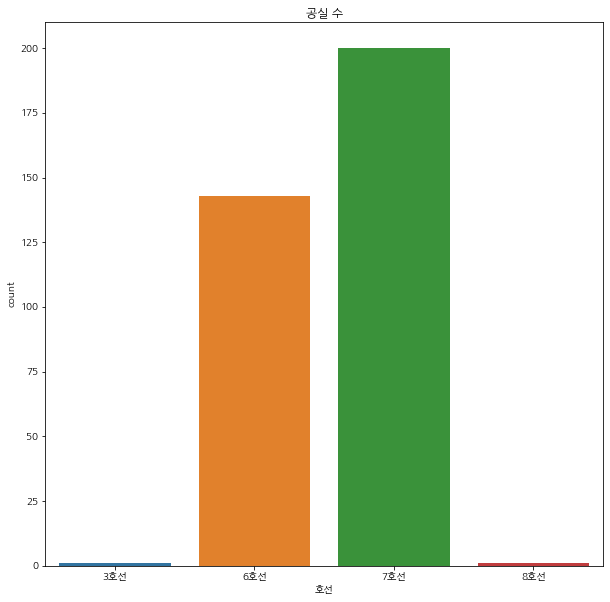

In [6]:
plt.figure(figsize = (10,10))
sns.countplot(data = gongsil, x = '호선')
plt.title('공실 수')
plt.savefig('공실 수.png')
plt.show()

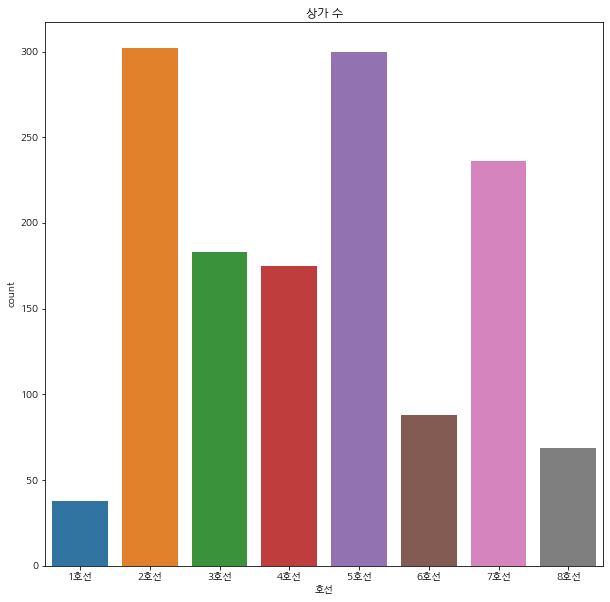

In [7]:
plt.figure(figsize = (10,10))
sns.countplot(data = sangga[sangga['영업업종'] != '공실'], x = '호선')
plt.title('상가 수')
plt.savefig('호선별 상가 임대 수.png')
plt.show()

In [8]:
sangga['임대료'] = sangga.loc[:,'임대료'].apply(lambda x:  0 if type(x) == str else x)
sangga.loc[:,'임대료'].fillna(0, inplace = True)
sangga['임대료'] = sangga['임대료'].astype('int64')
df = sangga.groupby(['호선', '역명']).mean().sort_values(by = '임대료', ascending=False)

In [ ]:
plt.figure(figsize = (10, 10), dpi = 200)
plt.bar(np.arange(10), df.loc[:,'임대료'][:10].apply(lambda x: x / 10000))
plt.xticks(np.arange(10), labels = df.index[:10], rotation = 25)
plt.ylabel('(만원)')
plt.title('임대료')
plt.savefig('임대료 top-10.png')
plt.show()

In [ ]:
plt.figure(figsize = (10, 10), dpi = 200)
plt.bar(np.arange(10), df.loc[:,'임대료'][:10].apply(lambda x: x / 10000))
plt.xticks(np.arange(10), labels = df.index[:10], rotation = 25)
plt.ylabel('(만원)')
plt.title('임대료')
plt.savefig('임대료 top-10.png')
plt.show()

공실수

In [11]:
gongsil = sangga[sangga['임대료'] == 0].groupby(['호선', '역명']).count()['임대료'].sort_values(ascending = False)

In [25]:
os.getcwd()

'c:\\Users\\EonKim\\Desktop\\github\\khu seminar\\subway'

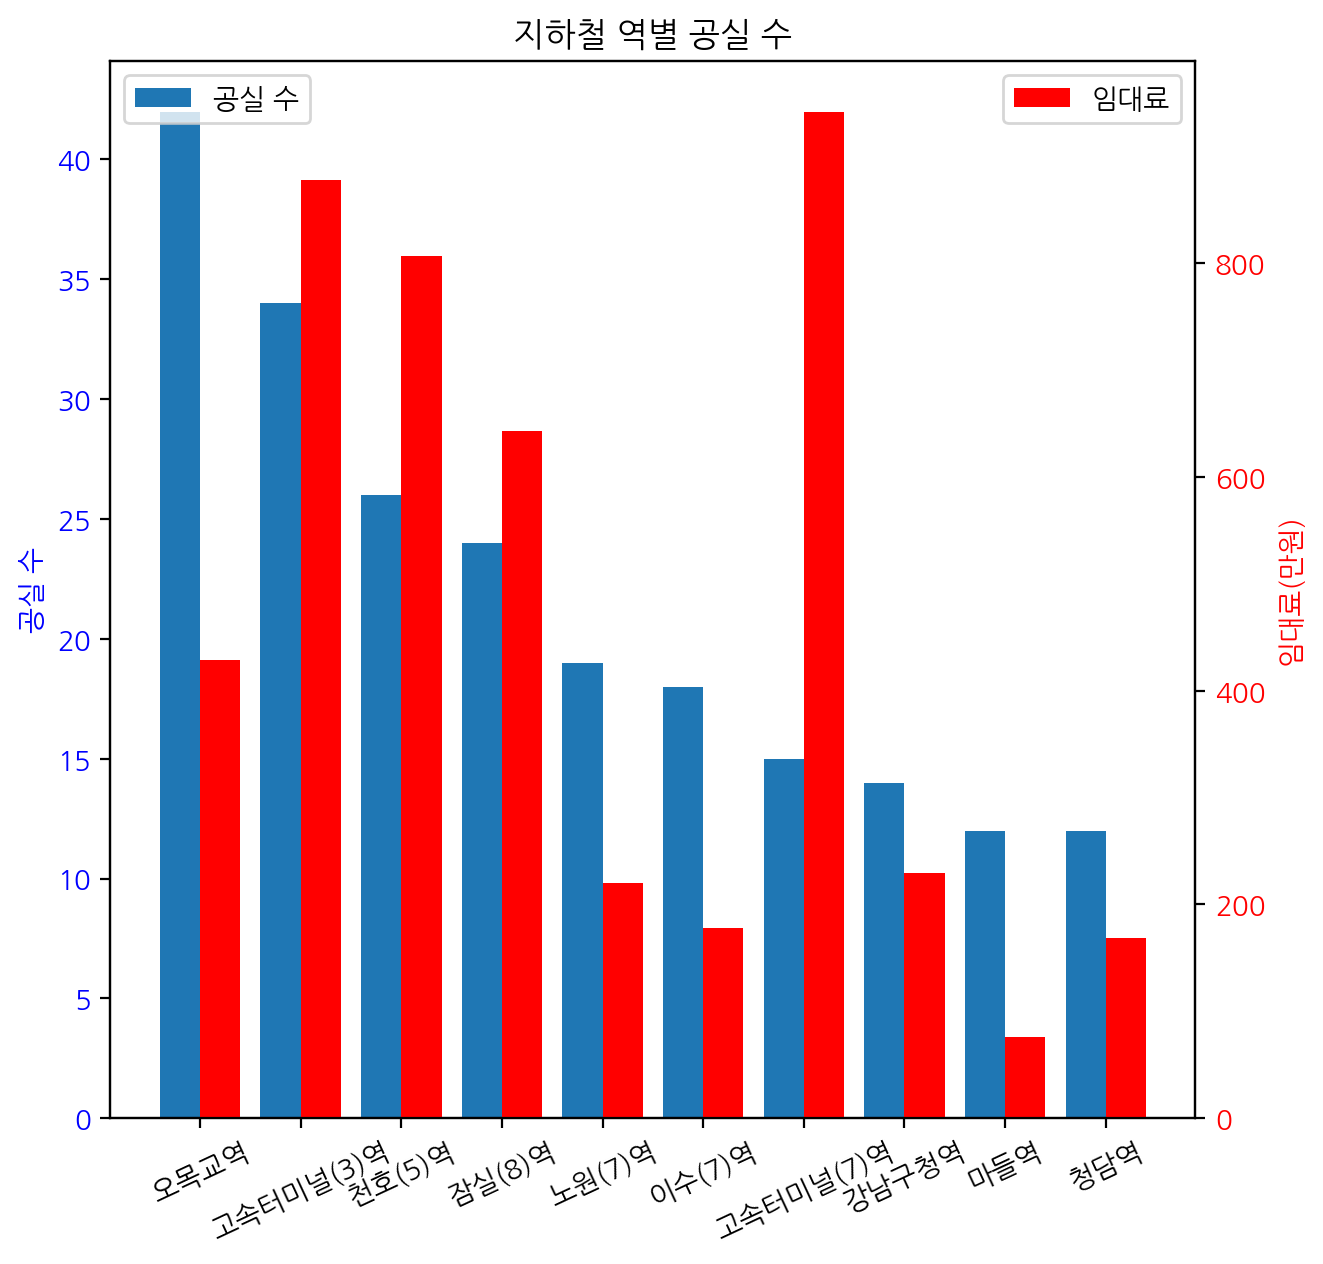

In [85]:
xlabel = [x[1] for x in gongsil.index[:10]]

plt.figure(figsize = (7, 7), dpi = 200)
plt.bar(np.arange(10)-0.2, gongsil[:10], width = 0.4, label = '공실 수')
plt.ylabel('공실 수', color = 'blue')
plt.yticks(color = 'blue')
plt.title('지하철 역별 공실 수')
plt.xticks(np.arange(10), xlabel, rotation =25)
plt.legend(loc = 'upper left')
plt.twinx()
plt.bar(np.arange(10)+0.2, df.loc[gongsil.index[:10],'임대료'].apply(lambda x: x/10000), width = 0.4, color = 'red', label = '임대료')
plt.ylabel('임대료(만원)', color = 'red')
plt.xticks(np.arange(10), xlabel, rotation =25)
plt.yticks(color = 'red')
plt.legend()
plt.savefig('임대료 + 공실수.png')
plt.show()

In [43]:
df.loc[gongsil.index[:5], '임대료']

호선   역명       
5호선  오목교역         4.284176e+06
3호선  고속터미널(3)역    8.777250e+06
5호선  천호(5)역       8.066421e+06
8호선  잠실(8)역       6.425522e+06
7호선  노원(7)역       2.196539e+06
Name: 임대료, dtype: float64

In [63]:
null = sangga[sangga['상가유형'] == '공실'].groupby('호선').count()['상가유형']

In [66]:
not_null = sangga.groupby('호선').count()['상가유형']

In [67]:
not_null

호선
1호선     38
2호선    302
3호선    184
4호선    175
5호선    300
6호선    231
7호선    436
8호선     70
Name: 상가유형, dtype: int64